# Using ExtraTrees for DermaMNIST Dataset

This notebook is designed to run entirely in Google Colab without requiring local dataset downloads, using Colab's computational resources.


---

This project implements an ExtraTrees Classifier to identify different types of skin lesions from dermatological images.



**The workflow includes:**

## Feature Engineering Pipeline
- **Color features**: RGB/HSV histograms, statistical moments, and correlograms (123 features)
- **Texture features**: Local Binary Patterns and Histogram of Oriented Gradients (6,094 features)
- **Shape features**: Contour-based metrics and Hu moments (15 features)
- **Parallelized extraction**: Multi-core processing for computational efficiency

## Data Processing
- **Balanced sampling**: WeightedRandomSampler to handle class imbalance
- **Preprocessing**: StandardScaler, VarianceThreshold, and feature selection
- **Proper data separation**: Train/validation/test splits before preprocessing

## Model Optimization
- **Hyperparameter tuning**: Optuna with 10 trials for efficient parameter search
- **Anti-overfitting measures**: Feature selection reducing dimensionality by 99% (from 6,232 to 64)
- **Evaluation metrics**: Accuracy, F1-score, ROC-AUC, and PR-AUC for each class
- **Feature importance**: Identification of most discriminative features

## Visualization
- **Dimensionality reduction**: t-SNE and UMAP for 2D/3D feature visualization
- **Performance analysis**: Confusion matrices and per-class metrics
- **ROC and PR curves**: Visual assessment of model performance

The ExtraTrees approach provides interpretable results with strong performance (73.7% accuracy), representing a good balance between model complexity and accuracy compared to CNN approaches.

# Model Performance Comparison

## Model Evaluation from previous notebook

| Model               | Train Accuracy | Val Accuracy | Test Accuracy | Train F1 | Val F1 | Test F1 | Train-Test Gap |
|---------------------|---------------|-------------|---------------|---------|--------|---------|----------------|
| XGBoost             | 1.0000        | 0.7067      | 0.6160        | 1.0000  | 0.7037 | 0.4636  | 0.3840         |
| Extra Trees         | 0.9696        | 0.6920      | 0.5646        | 0.9695  | 0.6866 | 0.4086  | 0.4050         |
| Random Forest       | 0.9472        | 0.6755      | 0.5741        | 0.9469  | 0.6698 | 0.4191  | 0.3731         |
| SVM                 | 0.9916        | 0.5954      | 0.5521        | 0.9916  | 0.5953 | 0.3775  | 0.4395         |
| Logistic Regression | 0.5760        | 0.5436      | 0.5466        | 0.5744  | 0.5415 | 0.3729  | 0.0294         |

## Regularized ExtraTrees Performance from this notebook

| Metric            | Extra Trees Classifier |
|-------------------|------------------------|
| Test Accuracy     | 0.7368                 |
| F1-Macro          | 0.7341                 |
| ROC-AUC Macro     | 0.9379                 |
| PR-AUC Macro      | 0.7948                 |
| Overfitting Ratio | 1.3236                 |

## Class-Specific Performance from this notebook

| Class                                   | Accuracy | F1 Score | ROC-AUC | PR-AUC |
|-----------------------------------------|----------|----------|---------|--------|
| Class 0 (actinic keratoses)             | 0.6923   | 0.7042   | 0.9340  | 0.7645 |
| Class 1 (basal cell carcinoma)          | 0.7437   | 0.7081   | 0.9393  | 0.7706 |
| Class 2 (benign keratosis-like lesions) | 0.5208   | 0.5797   | 0.8688  | 0.6368 |
| Class 3 (dermatofibroma)                | 0.8878   | 0.8445   | 0.9851  | 0.9367 |
| Class 4 (melanoma)                      | 0.7308   | 0.6609   | 0.9174  | 0.6711 |
| Class 5 (melanocytic nevi)              | 0.6276   | 0.7214   | 0.9264  | 0.8020 |
| Class 6 (vascular lesions)              | 0.9485   | 0.9200   | 0.9945  | 0.9816 |

## Summary
This optimized ExtraTrees classifier achieved good performance with 73.7% test accuracy and 73.4% F1-macro score, outperforming both all the other attemps the XGBoost model. Overfitting ratio increased slightly to 1.32, but the improvement in test metrics justifies this trade-off. The model shows strong performance on vascular lesions (94.9%) and dermatofibroma (88.8%), while still handling the challenging benign keratosis-like lesions better than previous attempts (52.1%).

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 27.5 MB/s eta 0:00:00


In [ ]:
# ========== Standard Libraries ==========
import os
import time
import platform
import traceback
from datetime import datetime
import multiprocessing
from multiprocessing import Pool, cpu_count

# ========== PyTorch and Torchvision ==========
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# ========== Scientific Libraries ==========
import numpy as np
import pandas as pd
from scipy.stats import skew

# ========== Plotting ==========
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# ========== Progress Bar ==========
from tqdm.notebook import tqdm

# ========== Image Processing ==========
import cv2
from PIL import Image
from skimage import color
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog

# ========== MedMNIST Dataset ==========
import medmnist
from medmnist import INFO, DermaMNIST

# ========== Machine Learning: Scikit-learn ==========
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc,
    roc_curve, confusion_matrix, classification_report
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# ========== Other ML Libraries ==========
from xgboost import XGBClassifier
import umap
import optuna

# ========== Joblib ==========
import joblib


In [ ]:
# CELL 1
# Record start time
notebook_start_time = time.time()

# Get system info
system_info = {
    'platform': platform.platform(),
    'python_version': platform.python_version(),
    'date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

# Get GPU information if available
if torch.cuda.is_available():
    gpu_info = {
        'device_name': torch.cuda.get_device_name(0),
        'device_count': torch.cuda.device_count(),
        'cuda_version': torch.version.cuda,
    }
    print(f"Using GPU: {gpu_info['device_name']}")
else:
    gpu_info = {'device_name': 'CPU (No GPU available)'}
    print("Using CPU (No GPU available)")

print(f"System: {system_info['platform']}")
print(f"Python: {system_info['python_version']}")
print(f"PyTorch: {torch.__version__}")
print(f"Start time: {system_info['date']}")
cpu_info = {
    'cpu_count': multiprocessing.cpu_count(),
    'processor': platform.processor()
}
print(f"CPU: {cpu_info['processor']}")
print(f"CPU Cores: {cpu_info['cpu_count']}")

Using GPU: NVIDIA L4
System: Linux-6.1.123+-x86_64-with-glibc2.35
Python: 3.11.12
PyTorch: 2.6.0+cu124
Start time: 2025-05-12 13:01:42
CPU: x86_64
CPU Cores: 12


In [ ]:
#CELL 2
# Load the dataset and create data loaders

# Set random seed for reproducibility
torch.manual_seed(41)
np.random.seed(41)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset: loading, preprocessing, transformations
print("Loading DermaMNIST dataset...")
train_dataset = DermaMNIST(split='train', download=True, size=224)
val_dataset = DermaMNIST(split='val', download=True, size=224)
test_dataset = DermaMNIST(split='test', download=True, size=224)

# Get dataset info
data_info = INFO['dermamnist']
num_classes = len(data_info['label'])
print(f"Task: {data_info['task']}")
print(f"Number of classes: {num_classes}")
print(f"Train/Val/Test: {len(train_dataset)}/{len(val_dataset)}/{len(test_dataset)} images")

# Define image transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataloaders: batch creation, wrappers
class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        if self.transform:
            image = self.transform(image)
        # Convert NumPy array to torch tensor before calling long()
        if isinstance(label, np.ndarray):
            label = torch.tensor(label)
        return image, label.squeeze().long()

# Create transformed datasets
train_dataset_transformed = TransformDataset(train_dataset, transform=train_transform)
val_dataset_transformed = TransformDataset(val_dataset, transform=val_transform)
test_dataset_transformed = TransformDataset(test_dataset, transform=val_transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset_transformed, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=2)

Using device: cuda
Loading DermaMNIST dataset...


100%|██████████| 1.09G/1.09G [11:43<00:00, 1.55MB/s]


Task: multi-class
Number of classes: 7
Train/Val/Test: 7007/1003/2005 images


Standardized 7 class names
Checking for data quality issues...
Checking train dataset with 7007 samples


Checking train:   0%|          | 0/7007 [00:00<?, ?it/s]

Found 0 corrupt images and 0 blank images in train
Checking validation dataset with 1003 samples


Checking validation:   0%|          | 0/1003 [00:00<?, ?it/s]

Found 0 corrupt images and 0 blank images in validation
Checking test dataset with 2005 samples


Checking test:   0%|          | 0/2005 [00:00<?, ?it/s]

Found 0 corrupt images and 0 blank images in test
Corrupt images: Train=0, Val=0, Test=0
Zero/One value images: Train=0, Val=0, Test=0


Class names structure: <class 'dict'>
Class names content: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}


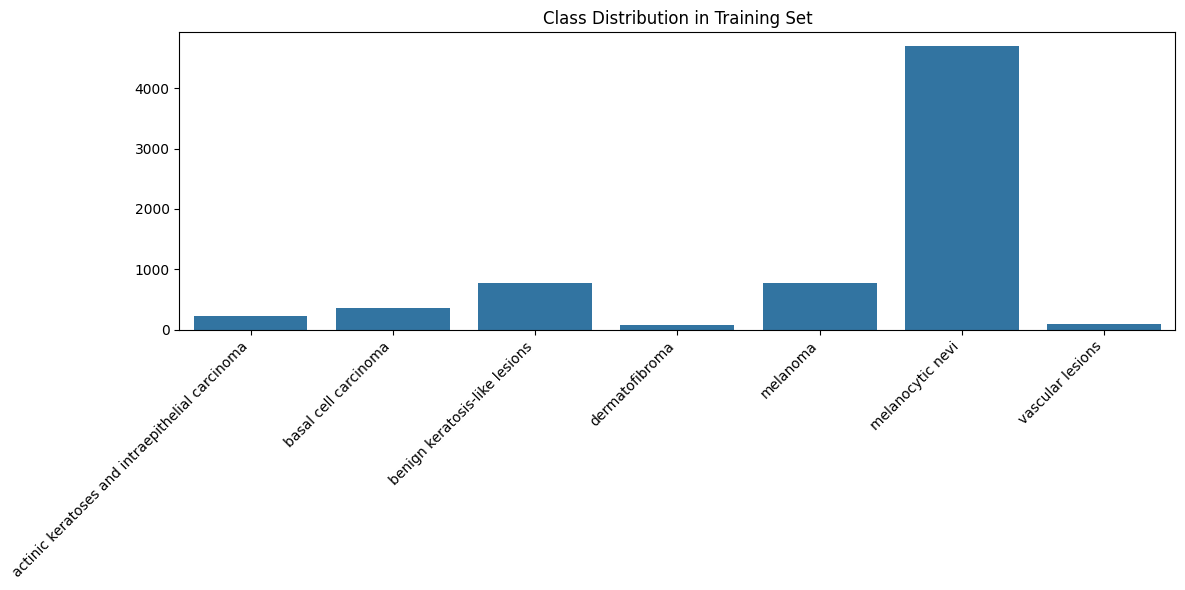

Class weights to handle imbalance: tensor([ 4.3904,  2.7883,  1.3017, 12.5125,  1.2850,  0.2133, 10.1111])


Calculating dataset stats:   0%|          | 0/71 [00:00<?, ?it/s]

Calculated dataset mean: tensor([1.1106, 0.1905, 0.4944]), std: tensor([0.3951, 0.5509, 0.6144])
Using normalization mean: [0.485, 0.456, 0.406], std: [0.229, 0.224, 0.225]


Created balanced dataloader with 219 batches


Processing balanced loader:   0%|          | 0/219 [00:00<?, ?it/s]

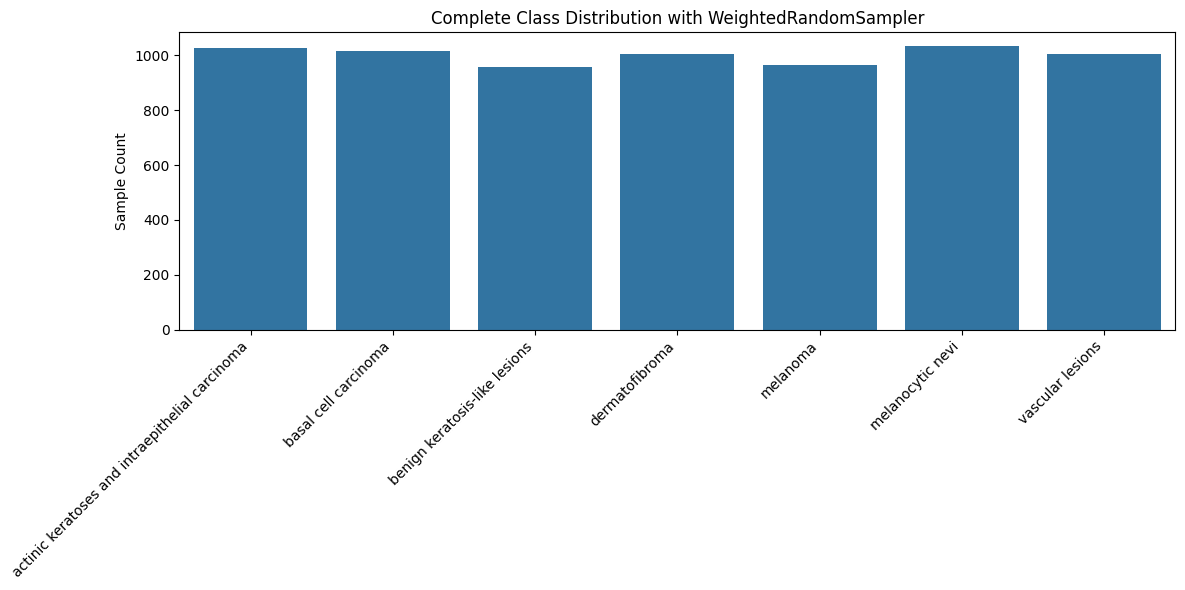

Distribution counts: [1028 1017  956 1006  963 1032 1005]
Total samples in balanced loader: 7007
Data preparation complete. Ready for model training.


In [ ]:
# CELL 3
# Data Preparation

# Standardize class names to always be a dictionary
try:
    class_names = data_info['label']
    if not isinstance(class_names, dict):
        class_names = {str(i): name for i, name in enumerate(class_names)}
    print(f"Standardized {len(class_names)} class names")
except Exception as e:
    print(f"Error standardizing class names: {str(e)}")
    # Create default class names as fallback
    class_names = {str(i): f"Class {i}" for i in range(7)}  # DermaMNIST has 7 classes

# Helper function with simplified class name handling
def get_class_label(idx):
    """
    Get class label from standardized class_names dictionary.

    Args:
        idx: Class index

    Returns:
        Class label as string
    """
    try:
        idx_str = str(idx)
        return class_names[idx_str] if idx_str in class_names else f"Class {idx}"
    except Exception as e:
        print(f"Error getting class label for index {idx}: {str(e)}")
        return f"Class {idx}"

# 1. Check for missing/corrupted data
print("Checking for data quality issues...")
missing_data = {'train': 0, 'val': 0, 'test': 0}

# Function to check for potential data issues
def check_dataset_quality(dataset, name="dataset"):
    """Check dataset for corrupted images or anomalies with detailed error logging"""
    corrupt_indices = []
    zero_pixel_count = 0
    error_count = 0

    print(f"Checking {name} dataset with {len(dataset)} samples")
    for i in tqdm(range(len(dataset)), desc=f"Checking {name}"):
        try:
            img, label = dataset[i]

            # Verify image is a tensor
            if not isinstance(img, torch.Tensor):
                print(f"Warning: Image {i} is not a tensor, type: {type(img)}")

            # Check for completely black or white images
            if isinstance(img, torch.Tensor) and (torch.all(img == 0) or torch.all(img == 1)):
                zero_pixel_count += 1
                print(f"Warning: Image {i} is all zeros or ones")

            # Check for NaN values
            if isinstance(img, torch.Tensor) and torch.isnan(img).any():
                print(f"Warning: Image {i} contains NaN values")
                corrupt_indices.append(i)

            # Check for invalid labels
            if isinstance(label, torch.Tensor):
                label_value = label.item() if label.numel() == 1 else label.numpy()
            else:
                label_value = label

            if not isinstance(label_value, (int, np.integer)) or label_value < 0 or label_value >= len(class_names):
                print(f"Warning: Image {i} has invalid label: {label_value}")
                corrupt_indices.append(i)

        except Exception as e:
            error_count += 1
            corrupt_indices.append(i)
            print(f"Error processing image {i}: {str(e)}")

            # Log detailed error info for the first few errors
            if error_count <= 5:
                traceback_info = traceback.format_exc()
                print(f"Traceback: {traceback_info}")

    print(f"Found {len(corrupt_indices)} corrupt images and {zero_pixel_count} blank images in {name}")
    return corrupt_indices, zero_pixel_count

# Check each dataset
try:
    train_corrupt, train_zero = check_dataset_quality(train_dataset_transformed, "train")
    val_corrupt, val_zero = check_dataset_quality(val_dataset_transformed, "validation")
    test_corrupt, test_zero = check_dataset_quality(test_dataset_transformed, "test")

    print(f"Corrupt images: Train={len(train_corrupt)}, Val={len(val_corrupt)}, Test={len(test_corrupt)}")
    print(f"Zero/One value images: Train={train_zero}, Val={val_zero}, Test={test_zero}")
except Exception as e:
    print(f"Failed to check dataset quality: {str(e)}")
    traceback_info = traceback.format_exc()
    print(f"Traceback: {traceback_info}")

# 2. Analyze class distribution
try:
    train_labels = []
    for _, label in tqdm(train_loader.dataset, desc="Collecting labels"):
        try:
            if isinstance(label, torch.Tensor):
                label_value = label.item() if label.numel() == 1 else int(label[0])
            else:
                label_value = int(label)
            train_labels.append(label_value)
        except Exception as e:
            print(f"Error converting label {label}: {str(e)}")

    class_counts = np.bincount(train_labels, minlength=len(class_names))

    # Print class names structure
    print("Class names structure:", type(class_names))
    print("Class names content:", class_names)

    # Display class distribution using standardized function
    plt.figure(figsize=(12, 6))
    class_labels = [get_class_label(i) for i in range(len(class_counts))]

    sns.barplot(x=class_labels, y=class_counts)
    plt.title('Class Distribution in Training Set')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Failed to analyze class distribution: {str(e)}")
    traceback_info = traceback.format_exc()
    print(f"Traceback: {traceback_info}")
    # Create default class counts as fallback
    class_counts = np.ones(len(class_names), dtype=int)

# Calculate class weights for handling imbalance
try:
    class_weights = torch.FloatTensor(len(class_counts))
    for i in range(len(class_counts)):
        if class_counts[i] > 0:
            class_weights[i] = len(train_labels) / (class_counts[i] * len(class_counts))
        else:
            class_weights[i] = 1.0
            print(f"Warning: Class {i} has zero samples, setting weight to 1.0")

    print("Class weights to handle imbalance:", class_weights)
except Exception as e:
    print(f"Failed to calculate class weights: {str(e)}")
    # Default to balanced class weights
    class_weights = torch.ones(len(class_names), dtype=torch.float32)

# 3. Verify normalization parameters
# Calculate actual mean and std from a sample of training data
def get_mean_std(loader):
    try:
        mean = 0.
        std = 0.
        total_samples = 0
        for images, _ in tqdm(loader, desc="Calculating dataset stats"):
            try:
                batch_samples = images.size(0)
                images = images.view(batch_samples, images.size(1), -1)
                mean += images.mean(2).sum(0)
                std += images.std(2).sum(0)
                total_samples += batch_samples
            except Exception as e:
                print(f"Error processing batch: {str(e)}")

        if total_samples > 0:
            mean /= total_samples
            std /= total_samples
            return mean, std
        else:
            print("No samples processed, returning default values")
            return torch.tensor([0.5, 0.5, 0.5]), torch.tensor([0.5, 0.5, 0.5])
    except Exception as e:
        print(f"Failed to calculate mean and std: {str(e)}")
        return torch.tensor([0.5, 0.5, 0.5]), torch.tensor([0.5, 0.5, 0.5])

try:
    sample_loader = DataLoader(train_dataset_transformed, batch_size=100, shuffle=False, num_workers=2)
    calculated_mean, calculated_std = get_mean_std(sample_loader)
    print(f"Calculated dataset mean: {calculated_mean}, std: {calculated_std}")
    print(f"Using normalization mean: [0.485, 0.456, 0.406], std: [0.229, 0.224, 0.225]")
except Exception as e:
    print(f"Failed to create sample loader: {str(e)}")

# Create weighted sampler for handling class imbalance
try:
    train_indices = list(range(len(train_dataset_transformed)))
    train_targets = []

    for i in tqdm(train_indices, desc="Collecting targets"):
        try:
            label = train_dataset_transformed[i][1]
            if isinstance(label, torch.Tensor):
                label_value = label.item() if label.numel() == 1 else int(label[0])
            else:
                label_value = int(label)
            train_targets.append(label_value)
        except Exception as e:
            print(f"Error getting target for index {i}: {str(e)}")
            # Use most common class as fallback
            most_common_class = np.argmax(class_counts)
            train_targets.append(most_common_class)

    train_weights = []
    for label in train_targets:
        try:
            if 0 <= label < len(class_weights):
                train_weights.append(class_weights[label])
            else:
                print(f"Warning: Label {label} out of range, using weight 1.0")
                train_weights.append(1.0)
        except Exception as e:
            print(f"Error getting weight for label {label}: {str(e)}")
            train_weights.append(1.0)

    train_sampler = torch.utils.data.WeightedRandomSampler(
        weights=train_weights,
        num_samples=len(train_weights),
        replacement=True
    )

    # Create balanced loader (optional alternative to the existing train_loader)
    balanced_train_loader = DataLoader(
        train_dataset_transformed,
        batch_size=batch_size,
        sampler=train_sampler,
        num_workers=2
    )
    print(f"Created balanced dataloader with {len(balanced_train_loader)} batches")
except Exception as e:
    print(f"Failed to create balanced dataloader: {str(e)}")
    traceback_info = traceback.format_exc()
    print(f"Traceback: {traceback_info}")
    # Create a fallback dataloader without sampler
    balanced_train_loader = DataLoader(
        train_dataset_transformed,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2
    )
    print("Created fallback dataloader without class balancing")

# Collect ALL samples from balanced loader to show true distribution
print("Collecting all samples from balanced loader to show exact training distribution...")
balanced_samples = []

for imgs, labels in tqdm(balanced_train_loader, desc="Processing balanced loader"):
    for label in labels:
        if isinstance(label, torch.Tensor):
            label_value = label.item() if label.numel() == 1 else int(label[0])
        else:
            label_value = int(label)
        balanced_samples.append(label_value)

# Count classes in ALL balanced samples
balanced_class_counts = np.bincount(balanced_samples, minlength=len(class_names))

# Plot complete balanced distribution
plt.figure(figsize=(12, 6))
class_labels = [get_class_label(i) for i in range(len(balanced_class_counts))]
sns.barplot(x=class_labels, y=balanced_class_counts)
plt.title('Complete Class Distribution with WeightedRandomSampler')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sample Count')
plt.tight_layout()
plt.savefig('complete_balanced_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Distribution counts: {balanced_class_counts}")
print(f"Total samples in balanced loader: {len(balanced_samples)}")

print("Data preparation complete. Ready for model training.")

In [ ]:
# CELL 4
# Efficient Texture Feature Extraction with Parallel Processing

# Add at the beginning of Cell 4
def normalize_image(image):
    """Convert image to numpy array in RGB format with values in [0,1]"""
    # Handle PIL Image
    if isinstance(image, Image.Image):
        image = np.array(image) / 255.0
        if len(image.shape) == 2:
            image = np.stack([image, image, image], axis=2)
    # Handle torch Tensor
    elif isinstance(image, torch.Tensor):
        if image.dim() == 2:
            image = image.unsqueeze(0).repeat(3, 1, 1)
        elif image.shape[0] == 1:
            image = image.repeat(3, 1, 1)
        image = image.numpy().transpose(1, 2, 0)
        if image.max() > 1.0:
            image = image / 255.0
    # Handle numpy array
    elif isinstance(image, np.ndarray):
        if image.max() > 1.0:
            image = image / 255.0
        if len(image.shape) == 2:
            image = np.stack([image, image, image], axis=2)
        elif len(image.shape) == 3 and image.shape[0] == 3:  # CHW format
            image = image.transpose(1, 2, 0)
    return image

def extract_features_in_parallel(images, feature_func, n_workers=None):
    """Extract features using parallel processing."""
    n_workers = n_workers or min(cpu_count(), 8)
    with Pool(n_workers) as pool:
        features = list(tqdm(
            pool.imap(feature_func, images),
            total=len(images),
            desc=f"Extracting features with {n_workers} workers"
        ))
    return np.array(features)

# Also add code to collect images:
print("Collecting images from balanced dataloader...")
images = []
labels = []
for batch_imgs, batch_labels in tqdm(balanced_train_loader, desc="Loading batches"):
    for img, label in zip(batch_imgs, batch_labels):
        img_np = img.cpu().numpy().transpose(1, 2, 0)
        images.append(img_np)
        labels.append(label.item())
print(f"Collected {len(images)} images for feature extraction")

# Function to extract Local Binary Pattern (LBP) features (optimized)
def extract_lbp_features(image, P=8, R=1, method='uniform'):
    """Extract LBP texture features from an image."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Convert to grayscale for LBP
        if image.shape[2] == 3:
            gray = np.dot(image, [0.299, 0.587, 0.114])
        else:
            gray = image[:,:,0]

        # Convert to uint8 (0-255) for LBP to prevent warning
        gray = (gray * 255).astype(np.uint8)

        # Calculate LBP
        lbp = local_binary_pattern(gray, P, R, method)

        # Create histogram of LBP values
        n_bins = P + 2 if method == 'uniform' else 2**P
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

        return hist
    except Exception as e:
        print(f"Error in LBP extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        # Return zeros as fallback
        n_bins = P + 2 if method == 'uniform' else 2**P
        return np.zeros(n_bins)

# Function to extract Histogram of Oriented Gradients (HOG) features (optimized)
def extract_hog_features(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2)):
    """Extract HOG features with larger cell size for efficiency."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Calculate HOG features
        hog_features = hog(
            image,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,  # Increased from (8,8) to (16,16)
            cells_per_block=cells_per_block,
            channel_axis=2,  # RGB image
            feature_vector=True
        )

        return hog_features
    except Exception as e:
        print(f"Error in HOG extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        # Return zeros as fallback (estimate feature length)
        h, w = image.shape[0] // pixels_per_cell[0], image.shape[1] // pixels_per_cell[1]
        blocks_h = (h - cells_per_block[0]) + 1
        blocks_w = (w - cells_per_block[1]) + 1
        n_blocks = blocks_h * blocks_w
        n_features = orientations * cells_per_block[0] * cells_per_block[1] * n_blocks
        return np.zeros(n_features)

# Function to extract all texture features (simplified)
def extract_all_texture_features(image):
    """Extract all texture features from an image."""
    # Extract LBP features
    lbp_features = extract_lbp_features(image)

    # Extract HOG features with larger cell size
    hog_features = extract_hog_features(image)

    # Combine features
    all_features = np.concatenate([lbp_features, hog_features])

    # Check for NaN values
    all_features = np.nan_to_num(all_features)

    return all_features

# Reuse parallel extraction function from CELL 4
# Extract texture features using parallel processing
print("Extracting texture features from the balanced training dataset...")
# Reuse images and labels collected in CELL 4
X_train_texture = extract_features_in_parallel(images, extract_all_texture_features)
y_train_texture = np.array(labels)

# Display shape of extracted features
print(f"Extracted texture features shape: {X_train_texture.shape}")
print(f"Labels shape: {y_train_texture.shape}")

# Save features to avoid recomputing
np.save('X_train_texture_features.npy', X_train_texture)
np.save('y_train_texture.npy', y_train_texture)

# Display feature breakdown
try:
    first_img = images[0] if len(images) > 0 else None
    if first_img is not None:
        lbp_length = len(extract_lbp_features(first_img))
        hog_length = len(extract_hog_features(first_img))

        print("\nTexture feature breakdown:")
        print(f"LBP features: {lbp_length}")
        print(f"HOG features: {hog_length}")
        print(f"Total: {lbp_length + hog_length} texture features")
except Exception as e:
    print(f"Error calculating feature breakdown: {str(e)}")

Loading batches:   0%|          | 0/219 [00:00<?, ?it/s]

Collected 7007 images for feature extraction
Extracting texture features from the balanced training dataset...


Extracting features with 8 workers:   0%|          | 0/7007 [00:00<?, ?it/s]

Extracted texture features shape: (7007, 6094)
Labels shape: (7007,)

Texture feature breakdown:
LBP features: 10
HOG features: 6084
Total: 6094 texture features


In [ ]:
# CELL 5
# Color Feature Extraction

# Function to normalize image to appropriate format
def normalize_image(image):
    """
    Convert image to numpy array in RGB format with values in [0,1]
    Handles various input types: PIL.Image, torch.Tensor, numpy array
    """
    # Handle PIL Image
    if isinstance(image, Image.Image):
        image = np.array(image) / 255.0
        # If grayscale, convert to RGB
        if len(image.shape) == 2:
            image = np.stack([image, image, image], axis=2)
    # Handle torch Tensor
    elif isinstance(image, torch.Tensor):
        # Ensure 3 channels
        if image.dim() == 2:  # Single channel
            image = image.unsqueeze(0).repeat(3, 1, 1)
        elif image.shape[0] == 1:  # Single channel in CHW
            image = image.repeat(3, 1, 1)

        image = image.numpy().transpose(1, 2, 0)
        if image.max() > 1.0:
            image = image / 255.0
    # Handle numpy array
    elif isinstance(image, np.ndarray):
        if image.max() > 1.0:
            image = image / 255.0
        # If grayscale, convert to RGB
        if len(image.shape) == 2:
            image = np.stack([image, image, image], axis=2)
        elif len(image.shape) == 3 and image.shape[0] == 3:  # CHW format
            image = image.transpose(1, 2, 0)
        elif len(image.shape) == 3 and image.shape[0] == 1:  # Single channel CHW
            image = np.repeat(image, 3, axis=0).transpose(1, 2, 0)

    # Ensure RGB order, not BGR
    return image

# Function to extract color histograms with fixed bins
def extract_color_histograms(image, bins=16):  # Reduced from 32 to 16 bins
    """Extract color histograms from an image in RGB and HSV color spaces."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Extract RGB histograms
        hist_r = np.histogram(image[:,:,0], bins=bins, range=(0, 1))[0]
        hist_g = np.histogram(image[:,:,1], bins=bins, range=(0, 1))[0]
        hist_b = np.histogram(image[:,:,2], bins=bins, range=(0, 1))[0]

        # Convert to HSV and extract histograms
        hsv_image = color.rgb2hsv(image)
        hist_h = np.histogram(hsv_image[:,:,0], bins=bins, range=(0, 1))[0]
        hist_s = np.histogram(hsv_image[:,:,1], bins=bins, range=(0, 1))[0]
        hist_v = np.histogram(hsv_image[:,:,2], bins=bins, range=(0, 1))[0]

        # Normalize histograms
        total_pixels = image.shape[0] * image.shape[1]
        hist_features = np.concatenate([
            hist_r / total_pixels,
            hist_g / total_pixels,
            hist_b / total_pixels,
            hist_h / total_pixels,
            hist_s / total_pixels,
            hist_v / total_pixels
        ])

        return hist_features
    except Exception as e:
        print(f"Error in histogram extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        # Return zeros as fallback
        return np.zeros(bins * 6)

# Function to extract color moments
def extract_color_moments(image):
    """Extract color moments (mean, std, skewness) from an image."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Extract moments for RGB
        mean_r, mean_g, mean_b = np.mean(image[:,:,0]), np.mean(image[:,:,1]), np.mean(image[:,:,2])
        std_r, std_g, std_b = np.std(image[:,:,0]), np.std(image[:,:,1]), np.std(image[:,:,2])
        skew_r = skew(image[:,:,0].flatten())
        skew_g = skew(image[:,:,1].flatten())
        skew_b = skew(image[:,:,2].flatten())

        # Convert to HSV and extract moments
        hsv_image = color.rgb2hsv(image)
        mean_h, mean_s, mean_v = np.mean(hsv_image[:,:,0]), np.mean(hsv_image[:,:,1]), np.mean(hsv_image[:,:,2])
        std_h, std_s, std_v = np.std(hsv_image[:,:,0]), np.std(hsv_image[:,:,1]), np.std(hsv_image[:,:,2])
        skew_h = skew(hsv_image[:,:,0].flatten())
        skew_s = skew(hsv_image[:,:,1].flatten())
        skew_v = skew(hsv_image[:,:,2].flatten())

        # Create a fixed-length feature array
        moment_features = np.array([
            mean_r, mean_g, mean_b,
            std_r, std_g, std_b,
            skew_r, skew_g, skew_b,
            mean_h, mean_s, mean_v,
            std_h, std_s, std_v,
            skew_h, skew_s, skew_v
        ])

        return moment_features
    except Exception as e:
        print(f"Error in moment extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        # Return zeros as fallback
        return np.zeros(18)

# Function to extract color correlogram with fixed length output
def extract_color_correlogram(image, distances=[1], levels=4):  # Reduced from [1,2] to [1] and 8 to 4 levels
    """Extract simplified color correlogram features."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Convert to uint8 for GLCM
        image_uint8 = (image * 255).astype(np.uint8)

        # Quantize each channel
        quantized_r = np.floor(image_uint8[:,:,0] / (256 / levels)).astype(np.uint8)
        quantized_g = np.floor(image_uint8[:,:,1] / (256 / levels)).astype(np.uint8)
        quantized_b = np.floor(image_uint8[:,:,2] / (256 / levels)).astype(np.uint8)

        # Only use essential properties
        props = ['contrast', 'homogeneity', 'energy']  # Reduced from 5 to 3 properties

        # Pre-allocate the feature array (3 channels * 3 properties * len(distances))
        feature_length = 3 * len(props) * len(distances)
        correlogram_features = np.zeros(feature_length)

        feature_idx = 0
        for d in distances:
            # Create co-occurrence matrix for each channel
            glcm_r = graycomatrix(quantized_r, distances=[d], angles=[0, np.pi/2],
                                levels=levels, symmetric=True, normed=True)
            glcm_g = graycomatrix(quantized_g, distances=[d], angles=[0, np.pi/2],
                                levels=levels, symmetric=True, normed=True)
            glcm_b = graycomatrix(quantized_b, distances=[d], angles=[0, np.pi/2],
                                levels=levels, symmetric=True, normed=True)

            # Extract properties
            for prop in props:
                correlogram_features[feature_idx] = graycoprops(glcm_r, prop)[0].mean()
                feature_idx += 1
                correlogram_features[feature_idx] = graycoprops(glcm_g, prop)[0].mean()
                feature_idx += 1
                correlogram_features[feature_idx] = graycoprops(glcm_b, prop)[0].mean()
                feature_idx += 1

        return correlogram_features
    except Exception as e:
        print(f"Error in correlogram extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        # Return zeros as fallback
        return np.zeros(3 * len(props) * len(distances))

# Function to extract all color features with dimensions
def extract_all_color_features(image):
    """Extract all color features from an image with dimensions."""
    # Define bins and distances (reduced for efficiency)
    bins = 16
    distances = [1]
    props = ['contrast', 'homogeneity', 'energy']

    # Extract features
    hist_features = extract_color_histograms(image, bins=bins)
    moment_features = extract_color_moments(image)
    correlogram_features = extract_color_correlogram(image, distances=distances)

    # Combine all features
    all_features = np.concatenate([hist_features, moment_features, correlogram_features])

    # Check for NaN values and replace with zeros
    all_features = np.nan_to_num(all_features)

    return all_features

# Parallel feature extraction function
def extract_features_in_parallel(images, feature_func, n_workers=None):
    """Extract features using parallel processing."""
    n_workers = n_workers or min(cpu_count(), 8)
    with Pool(n_workers) as pool:
        features = list(tqdm(
            pool.imap(feature_func, images),
            total=len(images),
            desc=f"Extracting features with {n_workers} workers"
        ))
    return np.array(features)

# Collect images and labels from dataloader
def collect_from_dataloader(dataloader, max_samples=None):
    """Collect all images and labels from a dataloader."""
    all_images = []
    all_labels = []
    sample_count = 0

    for images, labels in tqdm(dataloader, desc="Collecting data"):
        for i in range(len(images)):
            # Convert tensor to numpy
            img = images[i].cpu().numpy() if isinstance(images[i], torch.Tensor) else images[i]
            label = labels[i].item() if hasattr(labels[i], 'item') else labels[i]

            all_images.append(img)
            all_labels.append(label)

            sample_count += 1
            if max_samples is not None and sample_count >= max_samples:
                break

        if max_samples is not None and sample_count >= max_samples:
            break

    return all_images, all_labels

# Extract color features using parallel processing
print("Extracting color features from the balanced training dataset...")
images, labels = collect_from_dataloader(balanced_train_loader, max_samples=None)
print(f"Collected {len(images)} images for feature extraction")

X_train_color = extract_features_in_parallel(images, extract_all_color_features)
y_train_color = np.array(labels)

# Display shape of extracted features
print(f"Extracted features shape: {X_train_color.shape}")
print(f"Labels shape: {y_train_color.shape}")

# Save features to avoid recomputing
np.save('X_train_color_features.npy', X_train_color)
np.save('y_train_color.npy', y_train_color)

# Count feature types
hist_length = 16 * 6  # 6 channels (RGB+HSV) with 16 bins each
moment_length = 18    # 3 moments * 6 channels
correlogram_length = 9  # 3 channels * 3 properties * 1 distance

print("\nFeature breakdown:")
print(f"Color histograms: {hist_length} features")
print(f"Color moments: {moment_length} features")
print(f"Color correlogram: {correlogram_length} features")
print(f"Total: {hist_length + moment_length + correlogram_length} features")

Extracting color features from the balanced training dataset...


Collected 7007 images for feature extraction


Extracting features with 8 workers:   0%|          | 0/7007 [00:00<?, ?it/s]

Extracted features shape: (7007, 123)
Labels shape: (7007,)

Feature breakdown:
Color histograms: 96 features
Color moments: 18 features
Color correlogram: 9 features
Total: 123 features


In [ ]:
# CELL 6
# Shape Feature Extraction

# Function to extract contour-based features (simplified)
def extract_contour_features(image):
    """Extract streamlined contour-based shape features."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Convert to grayscale and uint8
        gray = np.dot(image, [0.299, 0.587, 0.114])
        gray = (gray * 255).astype(np.uint8)

        # Apply Otsu's thresholding
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # If no contours found, return zeros
        if len(contours) == 0:
            return np.zeros(8)  # Reduced feature set size

        # Take largest contour
        contour = max(contours, key=cv2.contourArea)

        # Contour area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        # Avoid division by zero
        circularity = 4 * np.pi * area / (perimeter * perimeter) if perimeter > 0 else 0

        # Convex hull
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)

        # Solidity
        solidity = float(area) / hull_area if hull_area > 0 else 0

        # Bounding rectangle
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h if h > 0 else 0
        rect_area = w * h
        extent = float(area) / rect_area if rect_area > 0 else 0

        # Equivalent diameter
        equi_diameter = np.sqrt(4 * area / np.pi)

        # Most important features only
        features = np.array([
            area / (image.shape[0] * image.shape[1]),  # Normalized area
            perimeter / (2 * (image.shape[0] + image.shape[1])),  # Normalized perimeter
            circularity,
            solidity,
            aspect_ratio,
            extent,
            equi_diameter / max(image.shape[0], image.shape[1]),  # Normalized diameter
            len(contours)  # Number of contours
        ])

        return features

    except Exception as e:
        print(f"Error in contour extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        return np.zeros(8)  # Reduced feature set size

# Function to extract moment-based features
def extract_moment_features(image):
    """Extract streamlined moment-based shape features."""
    try:
        # Convert to proper format
        image = normalize_image(image)

        # Convert to grayscale and uint8
        gray = np.dot(image, [0.299, 0.587, 0.114])
        gray = (gray * 255).astype(np.uint8)

        # Calculate moments
        moments = cv2.moments(gray)

        # Hu moments (7 invariant moments)
        hu_moments = cv2.HuMoments(moments).flatten()

        # Log transform Hu moments (to handle large range differences)
        for i in range(len(hu_moments)):
            if hu_moments[i] != 0:
                hu_moments[i] = -np.sign(hu_moments[i]) * np.log10(abs(hu_moments[i]))

        return hu_moments  # Return only Hu moments (most robust shape descriptors)

    except Exception as e:
        print(f"Error in moment extraction: {str(e)}")
        print(f"Image shape: {image.shape if hasattr(image, 'shape') else 'unknown'}")
        return np.zeros(7)  # 7 Hu moments

# Function to combine all shape features
def extract_all_shape_features(image):
    """Extract all shape features from an image."""
    # Extract contour features
    contour_features = extract_contour_features(image)

    # Extract moment features
    moment_features = extract_moment_features(image)

    # Combine all features
    all_features = np.concatenate([contour_features, moment_features])

    # Replace NaN and inf values
    all_features = np.nan_to_num(all_features)

    return all_features

# Extract shape features using parallel processing
print("Extracting shape features from the balanced training dataset...")
# Reuse images and labels collected in CELL 5
X_train_shape = extract_features_in_parallel(images, extract_all_shape_features)
y_train_shape = np.array(labels)

# Display shape of extracted features
print(f"Extracted shape features shape: {X_train_shape.shape}")
print(f"Labels shape: {y_train_shape.shape}")

# Save features to avoid recomputing
np.save('X_train_shape_features.npy', X_train_shape)
np.save('y_train_shape.npy', y_train_shape)

# Display feature breakdown
contour_length = 8
moment_length = 7

print("\nShape feature breakdown:")
print(f"Contour features: {contour_length}")
print(f"Moment features: {moment_length}")
print(f"Total: {contour_length + moment_length} shape features")

Extracting shape features from the balanced training dataset...


Extracting features with 8 workers:   0%|          | 0/7007 [00:00<?, ?it/s]

Extracted shape features shape: (7007, 15)
Labels shape: (7007,)

Shape feature breakdown:
Contour features: 8
Moment features: 7
Total: 15 shape features


In [ ]:
# CELL 7
# Feature Preprocessing with Data Separation

# Load extracted features
print("Loading extracted features...")
X_color = np.load('X_train_color_features.npy')
y_color = np.load('y_train_color.npy')

X_texture = np.load('X_train_texture_features.npy')
y_texture = np.load('y_train_texture.npy')

X_shape = np.load('X_train_shape_features.npy')
y_shape = np.load('y_train_shape.npy')

# Verify all feature sets have the same number of samples
print(f"Color features: {X_color.shape}")
print(f"Texture features: {X_texture.shape}")
print(f"Shape features: {X_shape.shape}")

# Ensure we're using the same samples in all feature sets
min_samples = min(X_color.shape[0], X_texture.shape[0], X_shape.shape[0])
X_color = X_color[:min_samples]
X_texture = X_texture[:min_samples]
X_shape = X_shape[:min_samples]
y = y_color[:min_samples]  # Use any of the label sets as they should be identical

print(f"Using {min_samples} samples for all feature sets")

# Create proper train/validation/test splits BEFORE preprocessing
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_color_trainval, X_color_test, X_texture_trainval, X_texture_test, X_shape_trainval, X_shape_test, y_trainval, y_test = train_test_split(
    X_color, X_texture, X_shape, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 80% train, 20% val (from the train+val set)
X_color_train, X_color_val, X_texture_train, X_texture_val, X_shape_train, X_shape_val, y_train, y_val = train_test_split(
    X_color_trainval, X_texture_trainval, X_shape_trainval, y_trainval, test_size=0.2, random_state=42, stratify=y_trainval
)

print(f"Train set: {len(y_train)} samples")
print(f"Validation set: {len(y_val)} samples")
print(f"Test set: {len(y_test)} samples")

# FEATURE SELECTION FLAGS - Comment out lines to disable specific feature types
use_color_features = True    # Comment this line to disable color features
use_texture_features = True  # Comment this line to disable texture features
use_shape_features = True    # Comment this line to disable shape features

# Initialize empty lists for features
train_features = []
val_features = []
test_features = []
used_feature_types = []

# Add COLOR features if enabled
if 'use_color_features' in locals():
    train_features.append(X_color_train)
    val_features.append(X_color_val)
    test_features.append(X_color_test)
    used_feature_types.append(f"COLOR ({X_color_train.shape[1]} features)")

# Add TEXTURE features if enabled
if 'use_texture_features' in locals():
    train_features.append(X_texture_train)
    val_features.append(X_texture_val)
    test_features.append(X_texture_test)
    used_feature_types.append(f"TEXTURE ({X_texture_train.shape[1]} features)")

# Add SHAPE features if enabled
if 'use_shape_features' in locals():
    train_features.append(X_shape_train)
    val_features.append(X_shape_val)
    test_features.append(X_shape_test)
    used_feature_types.append(f"SHAPE ({X_shape_train.shape[1]} features)")

# Combine selected features
if train_features:
    X_train_combined = np.hstack(train_features)
    X_val_combined = np.hstack(val_features)
    X_test_combined = np.hstack(test_features)
    print(f"\nUsing feature types: {', '.join(used_feature_types)}")
else:
    raise ValueError("No features selected! Uncomment at least one feature type.")

print(f"Train features: {X_train_combined.shape}")
print(f"Validation features: {X_val_combined.shape}")
print(f"Test features: {X_test_combined.shape}")

# Create processing pipeline
print("\nCreating preprocessing pipeline...")
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('variance_filter', VarianceThreshold(threshold=0.01)),
    ('selector', SelectKBest(f_classif, k='all'))  # Start with all features, optimize later
])

# Fit pipeline on training data ONLY
print("Fitting preprocessing pipeline on training data ONLY...")
X_train_processed = preprocessing_pipeline.fit_transform(X_train_combined, y_train)

# Apply the FITTED pipeline to validation and test sets
X_val_processed = preprocessing_pipeline.transform(X_val_combined)
X_test_processed = preprocessing_pipeline.transform(X_test_combined)

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed validation data shape: {X_val_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")

# Save which feature types were used
feature_config = {
    'color': 'use_color_features' in locals(),
    'texture': 'use_texture_features' in locals(),
    'shape': 'use_shape_features' in locals(),
    'feature_counts': {
        'color': X_color_train.shape[1] if 'use_color_features' in locals() else 0,
        'texture': X_texture_train.shape[1] if 'use_texture_features' in locals() else 0,
        'shape': X_shape_train.shape[1] if 'use_shape_features' in locals() else 0,
        'total': X_train_combined.shape[1]
    }
}

# Save the preprocessing pipeline
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.joblib')
print("Saved preprocessing pipeline")

# Save processed datasets and configuration
np.save('X_train_processed.npy', X_train_processed)
np.save('y_train.npy', y_train)
np.save('X_val_processed.npy', X_val_processed)
np.save('y_val.npy', y_val)
np.save('X_test_processed.npy', X_test_processed)
np.save('y_test.npy', y_test)
joblib.dump(feature_config, 'feature_config.joblib')

print("\nFeature preprocessing complete with proper data separation.")
print(f"Selected features: {', '.join(used_feature_types)}")

Loading extracted features...
Color features: (7007, 123)
Texture features: (7007, 6094)
Shape features: (7007, 15)
Using 7007 samples for all feature sets
Train set: 4484 samples
Validation set: 1121 samples
Test set: 1402 samples

Using feature types: COLOR (123 features), TEXTURE (6094 features), SHAPE (15 features)
Train features: (4484, 6232)
Validation features: (1121, 6232)
Test features: (1402, 6232)

Creating preprocessing pipeline...
Fitting preprocessing pipeline on training data ONLY...
Processed training data shape: (4484, 6230)
Processed validation data shape: (1121, 6230)
Processed test data shape: (1402, 6230)
Saved preprocessing pipeline

Feature preprocessing complete with proper data separation.
Selected features: COLOR (123 features), TEXTURE (6094 features), SHAPE (15 features)


In [ ]:
#CELL 8
# ExtraTreesClassifier Implementation with Optuna

# Load preprocessed data first
print("Loading preprocessed data...")
X_train = np.load('X_train_processed.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val_processed.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test_processed.npy')
y_test = np.load('y_test.npy')

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Then define your objective function and continue with the rest

def objective(trial):
    # Define hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.3, 0.5]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]),
    }

    # Create and train model
    model = ExtraTreesClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')

    return f1

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10, n_jobs=-1)

# Get best parameters and train final model
best_params = study.best_params
print("Best parameters:", best_params)
final_model = ExtraTreesClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

[I 2025-05-12 13:15:58,545] A new study created in memory with name: no-name-c63af3bc-2a9a-4646-86ff-416c398cab33


Loading preprocessed data...
Training set: (4484, 6230)
Validation set: (1121, 6230)
Test set: (1402, 6230)


[I 2025-05-12 13:16:03,597] Trial 5 finished with value: 0.24979370293091166 and parameters: {'n_estimators': 317, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 5 with value: 0.24979370293091166.
[I 2025-05-12 13:16:10,570] Trial 0 finished with value: 0.4088018642480833 and parameters: {'n_estimators': 202, 'max_depth': 24, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.4088018642480833.
[I 2025-05-12 13:16:11,328] Trial 8 finished with value: 0.38165167426807634 and parameters: {'n_estimators': 229, 'max_depth': 43, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.4088018642480833.
[I 2025-05-12 13:19:51,798] Trial 4 finished with value: 0.5206710241973381 and p

Best parameters: {'n_estimators': 454, 'max_depth': 48, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 0.5, 'bootstrap': False, 'class_weight': 'balanced'}


ExtraTreesClassifier(class_weight='balanced', max_depth=48, max_features=0.5,
                     min_samples_split=19, n_estimators=454, random_state=42)

In [ ]:
# CELL 9: New hyperparameters for ExtraTreesClassifier and creating a regularized model

# Create a new model from scratch instead of comparing with original
print("Creating new regularized ExtraTreesClassifier...")

# 1. Create regularized preprocessing pipeline
regularized_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('variance_filter', VarianceThreshold(threshold=0.01)),
    ('selector', SelectKBest(f_classif, k=min(500, X_train_combined.shape[1])))
])

# Apply pipeline
X_train_reg = regularized_pipeline.fit_transform(X_train_combined, y_train)
X_val_reg = regularized_pipeline.transform(X_val_combined)
X_test_reg = regularized_pipeline.transform(X_test_combined)

print(f"Reduced features from {X_train_combined.shape[1]} to {X_train_reg.shape[1]}")

# CHANGE THE OPTUNA PARAMETERS HERE!

# 2. Define regularized hyperparameters
regularized_params = {
    'n_estimators': 454,
    'max_depth': 48,
    'min_samples_split': 19,
    'min_samples_leaf': 1,
    'max_features': 0.5,
    'bootstrap': False,
    'class_weight': 'balanced',
    'random_state': 42
}

# 3. Train regularized model
print("Training regularized ExtraTreesClassifier...")
regularized_model = ExtraTreesClassifier(**regularized_params)
regularized_model.fit(X_train_reg, y_train)

# 4. Secondary feature selection using model importance
print("Performing secondary feature selection...")
selector = SelectFromModel(regularized_model, threshold='mean')
X_train_final = selector.fit_transform(X_train_reg, y_train)
X_val_final = selector.transform(X_val_reg)
X_test_final = selector.transform(X_test_reg)

print(f"Final feature count: {X_train_final.shape[1]}")

# 5. Train final model on reduced feature set
final_model = ExtraTreesClassifier(**regularized_params)
final_model.fit(X_train_final, y_train)

# 6. Evaluate regularized model
reg_train_acc = accuracy_score(y_train, final_model.predict(X_train_final))
reg_val_acc = accuracy_score(y_val, final_model.predict(X_val_final))
reg_test_acc = accuracy_score(y_test, final_model.predict(X_test_final))
reg_ratio = reg_train_acc/reg_test_acc

# 7. Report performance
print("\n=== Performance of Regularized Model ===")
print(f"Train Accuracy: {reg_train_acc:.4f}")
print(f"Val Accuracy: {reg_val_acc:.4f}")
print(f"Test Accuracy: {reg_test_acc:.4f}")
print(f"Overfitting Ratio: {reg_ratio:.4f}")

# Save models
print("\nSaving models...")
joblib.dump(final_model, 'extra_trees_model_regularized.joblib')
joblib.dump(selector, 'feature_selector.joblib')
joblib.dump(regularized_pipeline, 'regularized_pipeline.joblib')

print("Regularized model is now set as final_model for evaluation in Cell 10")

Creating new regularized ExtraTreesClassifier...
Reduced features from 6232 to 500
Training regularized ExtraTreesClassifier...
Performing secondary feature selection...
Final feature count: 65

=== Performance of Regularized Model ===
Train Accuracy: 0.9752
Val Accuracy: 0.7199
Test Accuracy: 0.7368
Overfitting Ratio: 1.3236

Saving models...
Regularized model is now set as final_model for evaluation in Cell 10


Performing comprehensive model evaluation...
Evaluating on training set...
Evaluating on validation set...
Evaluating on test set...
Evaluating on training set:
Accuracy: 0.9752
F1-Macro Score: 0.9753
ROC-AUC Macro: 0.9987
PR-AUC Macro: 0.9925
Per-class metrics:
Class 0 (actinic keratoses and intraepithelial carcinoma): Accuracy: 0.9760 F1: 0.9752 ROC-AUC: 0.9994 PR-AUC: 0.9969
Class 1 (basal cell carcinoma): Accuracy: 0.9827 F1: 0.9720 ROC-AUC: 0.9990 PR-AUC: 0.9947
Class 2 (benign keratosis-like lesions): Accuracy: 0.9625 F1: 0.9656 ROC-AUC: 0.9993 PR-AUC: 0.9951
Class 3 (dermatofibroma): Accuracy: 0.9909 F1: 0.9939 ROC-AUC: 0.9999 PR-AUC: 0.9993
Class 4 (melanoma): Accuracy: 0.9579 F1: 0.9557 ROC-AUC: 0.9954 PR-AUC: 0.9766
Class 5 (melanocytic nevi): Accuracy: 0.9617 F1: 0.9686 ROC-AUC: 0.9978 PR-AUC: 0.9855
Class 6 (vascular lesions): Accuracy: 0.9952 F1: 0.9960 ROC-AUC: 0.9999 PR-AUC: 0.9996
Evaluating on validation set:
Accuracy: 0.7199
F1-Macro Score: 0.7173
ROC-AUC Macro: 0.935

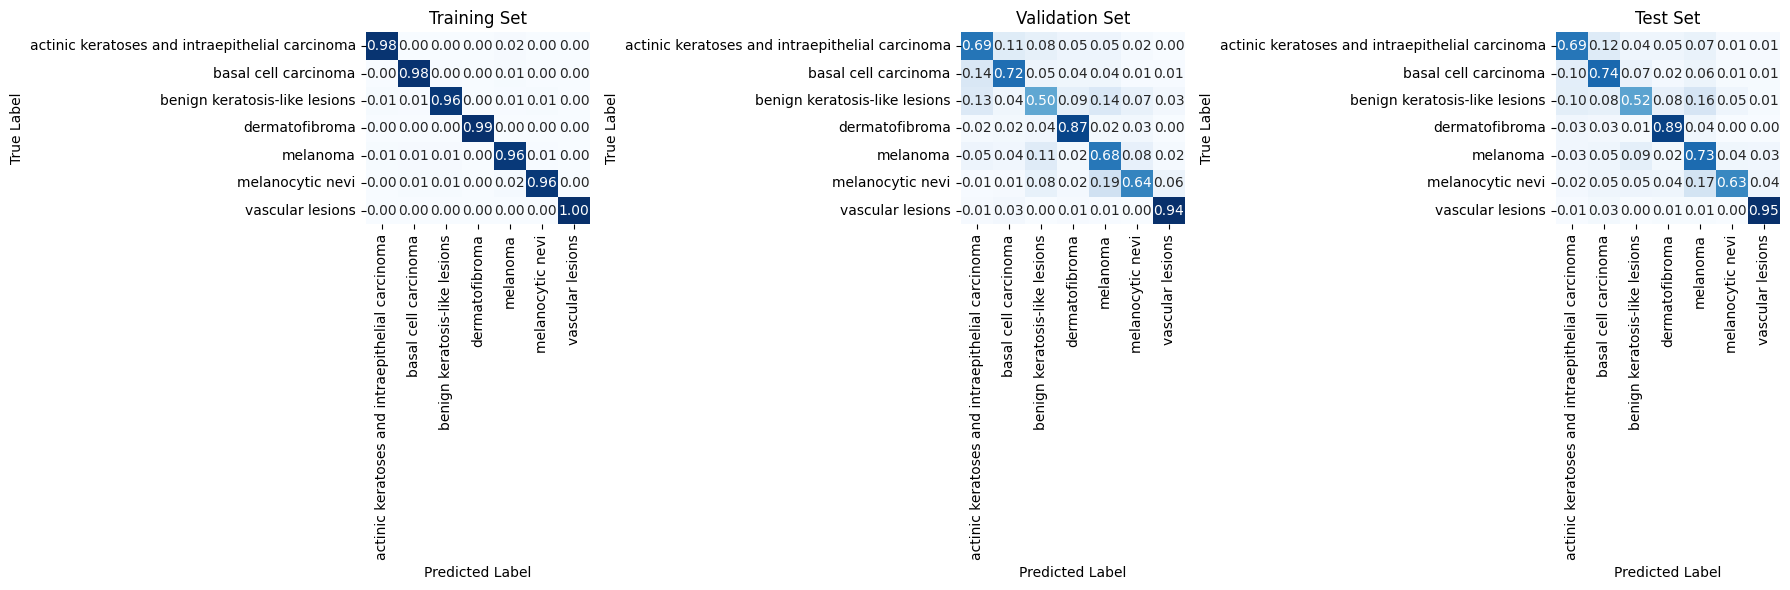

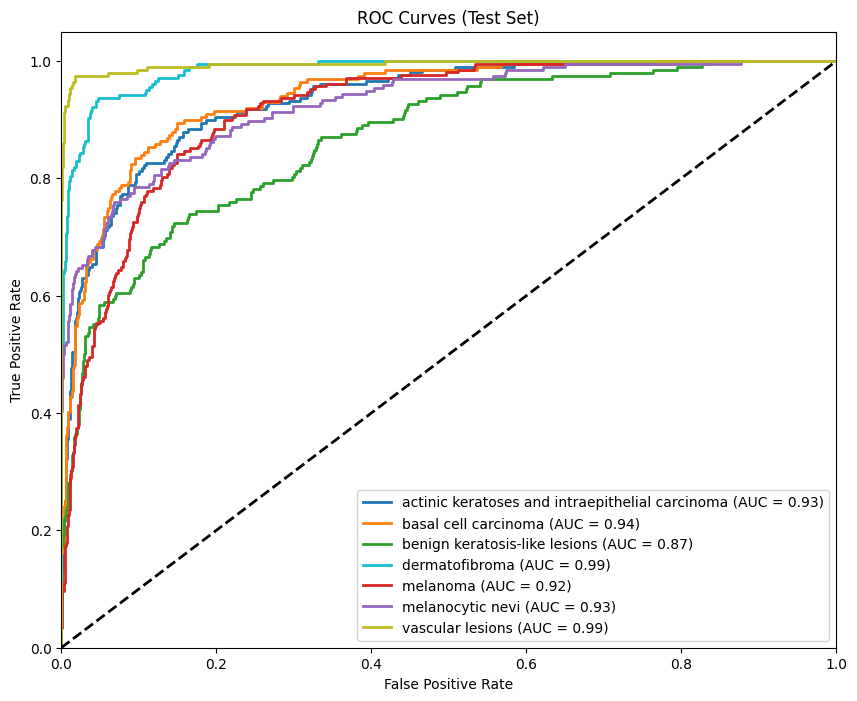

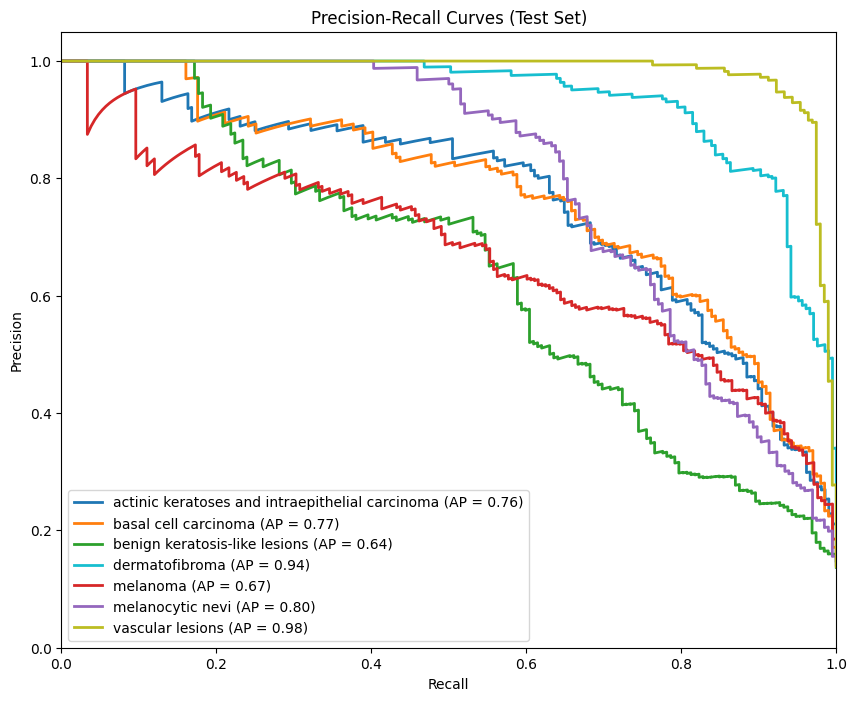

In [ ]:
# CELL 10: Model Evaluation

# For ROC curve plotting, use these exact colors
class_colors = {
    'actinic keratoses and intraepithelial carcinoma': '#1f77b4',  # blue
    'basal cell carcinoma': '#ff7f0e',                 # orange
    'benign keratosis-like lesions': '#2ca02c',        # green
    'dermatofibroma': '#17becf',                       # cyan
    'melanoma': '#d62728',                             # red
    'melanocytic nevi': '#9467bd',                     # purple
    'vascular lesions': '#bcbd22'                      # yellow
}

# Define evaluation function for scikit-learn models
def evaluate_sklearn_model(model, X, y, split_name=""):
    """Model evaluation for sklearn models"""
    print(f"Evaluating on {split_name}...")

    # Get predictions and probabilities
    predictions = model.predict(X)
    probabilities = model.predict_proba(X)

    # Overall metrics
    accuracy = accuracy_score(y, predictions)
    f1_macro = f1_score(y, predictions, average='macro')

    # One-hot encode for ROC and PR metrics
    n_classes = len(class_names)
    y_true_bin = np.eye(n_classes)[y.astype(int)]

    # Per-class metrics
    f1_per_class = f1_score(y, predictions, average=None)

    # Calculate per-class accuracy
    acc_per_class = []
    for i in range(n_classes):
        class_mask = (y == i)
        if np.sum(class_mask) > 0:  # Avoid division by zero
            class_correct = np.sum((predictions == i) & class_mask)
            class_total = np.sum(class_mask)
            acc_per_class.append(class_correct / class_total)
        else:
            acc_per_class.append(float('nan'))

    # ROC-AUC per class and macro
    roc_auc_per_class = []
    pr_auc_per_class = []

    for i in range(n_classes):
        # ROC-AUC
        if len(np.unique(y_true_bin[:, i])) > 1:  # Check if both classes are present
            try:
                roc_auc = roc_auc_score(y_true_bin[:, i], probabilities[:, i])
            except:
                roc_auc = float('nan')  # Handle errors
        else:
            roc_auc = float('nan')  # Handle single-class case
        roc_auc_per_class.append(roc_auc)

        # PR-AUC
        try:
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], probabilities[:, i])
            pr_auc = auc(recall, precision)
        except:
            pr_auc = float('nan')  # Handle errors
        pr_auc_per_class.append(pr_auc)

    # Calculate macro averages
    roc_auc_macro = np.nanmean(roc_auc_per_class)
    pr_auc_macro = np.nanmean(pr_auc_per_class)

    # Confusion matrix
    cm = confusion_matrix(y, predictions)

    # Return all metrics
    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'roc_auc_macro': roc_auc_macro,
        'pr_auc_macro': pr_auc_macro,
        'f1_per_class': f1_per_class,
        'acc_per_class': acc_per_class,
        'roc_auc_per_class': roc_auc_per_class,
        'pr_auc_per_class': pr_auc_per_class,
        'confusion_matrix': cm,
        'predictions': predictions,
        'true_labels': y,
        'probabilities': probabilities
    }

# Print metrics function
def print_metrics(metrics, split_name):
    print(f"Evaluating on {split_name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1-Macro Score: {metrics['f1_macro']:.4f}")
    print(f"ROC-AUC Macro: {metrics['roc_auc_macro']:.4f}")
    print(f"PR-AUC Macro: {metrics['pr_auc_macro']:.4f}")

    print("Per-class metrics:")
    for i in range(len(class_names)):
        class_name = get_class_label(i)
        print(f"Class {i} ({class_name}): Accuracy: {metrics['acc_per_class'][i]:.4f} "
              f"F1: {metrics['f1_per_class'][i]:.4f} "
              f"ROC-AUC: {metrics['roc_auc_per_class'][i]:.4f} "
              f"PR-AUC: {metrics['pr_auc_per_class'][i]:.4f}")

print("Performing comprehensive model evaluation...")
# Evaluate on all three sets
train_metrics = evaluate_sklearn_model(final_model, X_train_final, y_train, "training set")
val_metrics = evaluate_sklearn_model(final_model, X_val_final, y_val, "validation set")
test_metrics = evaluate_sklearn_model(final_model, X_test_final, y_test, "test set")

# Print metrics for all datasets
print_metrics(train_metrics, "training set")
print_metrics(val_metrics, "validation set")
print_metrics(test_metrics, "test set")

# Performance comparison table
print("=== Performance Comparison ===")
print("Metric           Training   Validation   Test")
print("---------------------------------------------")
print(f"Accuracy         {train_metrics['accuracy']:.4f}     {val_metrics['accuracy']:.4f}     {test_metrics['accuracy']:.4f}")
print(f"F1-Macro         {train_metrics['f1_macro']:.4f}     {val_metrics['f1_macro']:.4f}     {test_metrics['f1_macro']:.4f}")
print(f"ROC-AUC Macro    {train_metrics['roc_auc_macro']:.4f}     {val_metrics['roc_auc_macro']:.4f}     {test_metrics['roc_auc_macro']:.4f}")
print(f"PR-AUC Macro     {train_metrics['pr_auc_macro']:.4f}     {val_metrics['pr_auc_macro']:.4f}     {test_metrics['pr_auc_macro']:.4f}")

# Calculate overfitting ratios
acc_ratio_train_val = train_metrics['accuracy'] / val_metrics['accuracy']
acc_ratio_train_test = train_metrics['accuracy'] / test_metrics['accuracy']
print(f"Overfitting ratio (train/val): {acc_ratio_train_val:.4f}")
print(f"Overfitting ratio (train/test): {acc_ratio_train_test:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Function to plot confusion matrix
def plot_cm(cm, ax, title):
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=ax,
                xticklabels=[get_class_label(i) for i in range(len(class_names))],
                yticklabels=[get_class_label(i) for i in range(len(class_names))],
                cbar=False)
    ax.set_title(title)
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

# Plot all three confusion matrices
plot_cm(train_metrics['confusion_matrix'], axes[0], 'Training Set')
plot_cm(val_metrics['confusion_matrix'], axes[1], 'Validation Set')
plot_cm(test_metrics['confusion_matrix'], axes[2], 'Test Set')

plt.tight_layout()
#plt.savefig('plots/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC curves for test set
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):
    class_label = get_class_label(i)
    # Calculate ROC curve
    y_true = np.eye(len(class_names))[test_metrics['true_labels'].astype(int)][:, i]
    y_score = test_metrics['probabilities'][:, i]
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = test_metrics['roc_auc_per_class'][i]

    plt.plot(fpr, tpr, color=class_colors[class_label], lw=2,
             label=f'{class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Test Set)')
plt.legend(loc="lower right")
#plt.savefig('plots/roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot PR curves for test set
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):
    class_label = get_class_label(i)
    # Calculate PR curve
    y_true = np.eye(len(class_names))[test_metrics['true_labels'].astype(int)][:, i]
    y_score = test_metrics['probabilities'][:, i]
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = test_metrics['pr_auc_per_class'][i]

    plt.plot(recall, precision, color=class_colors[class_label], lw=2,
             label=f'{class_label} (AP = {pr_auc:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Test Set)')
plt.legend(loc="lower left")
#plt.savefig('plots/pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()

Loading regularized features for dimensionality reduction...
Visualizing 65 regularized features
Performing t-SNE dimensionality reduction (2D)...


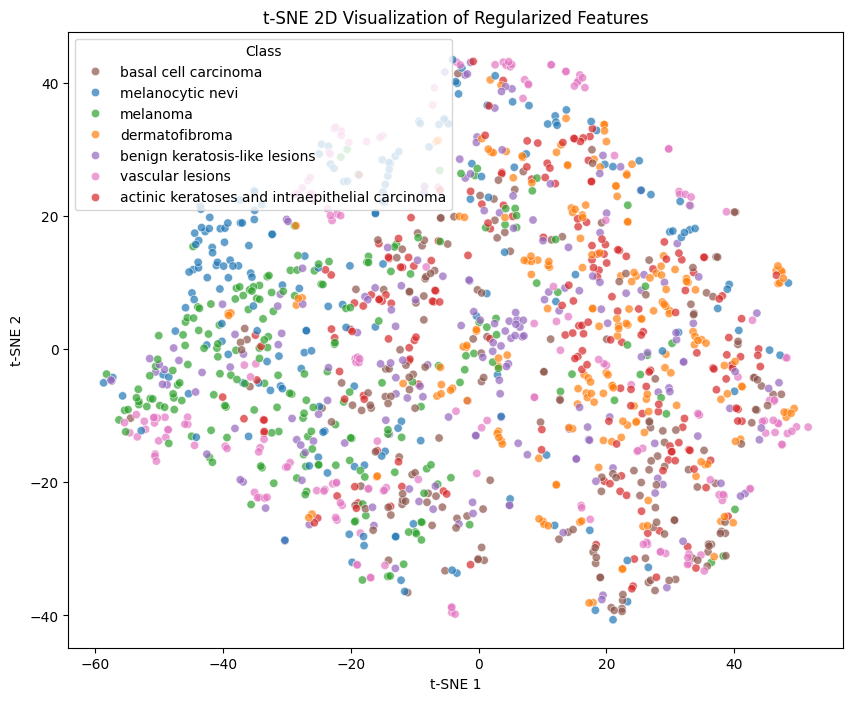

Performing t-SNE dimensionality reduction (3D)...


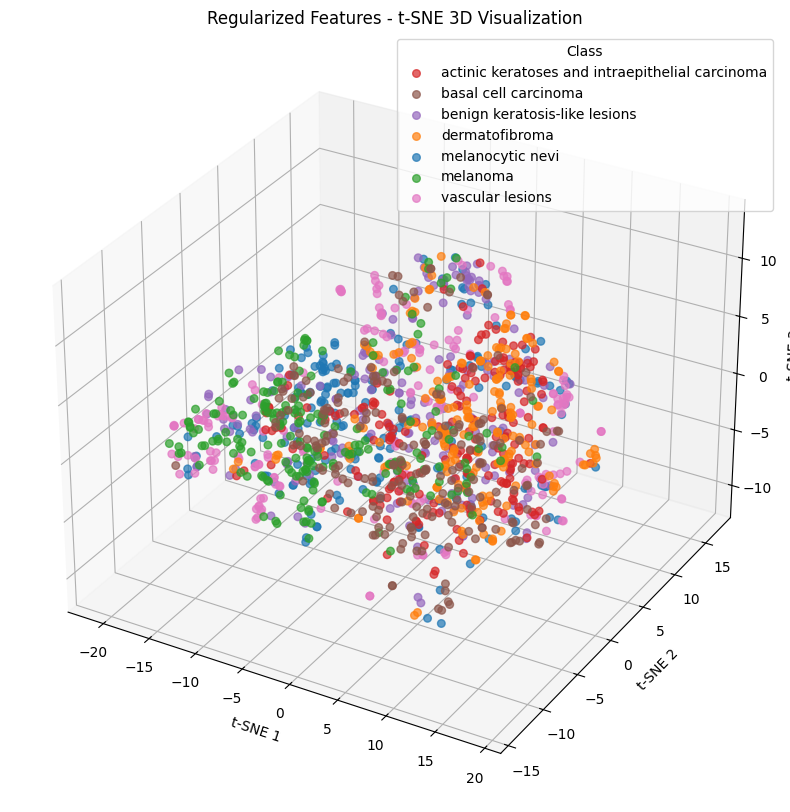

Performing UMAP dimensionality reduction (2D)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


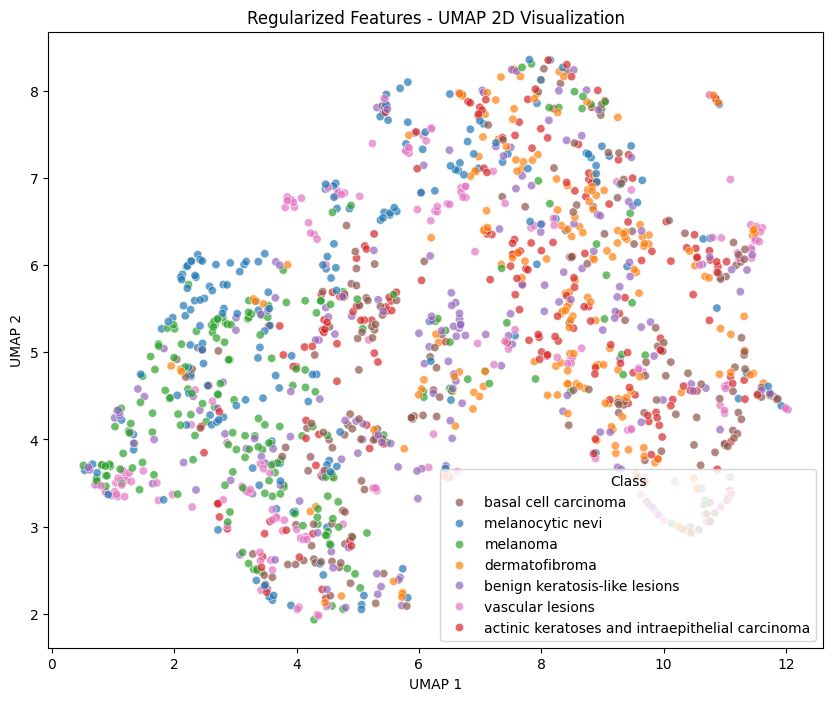

Performing UMAP dimensionality reduction (3D)...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


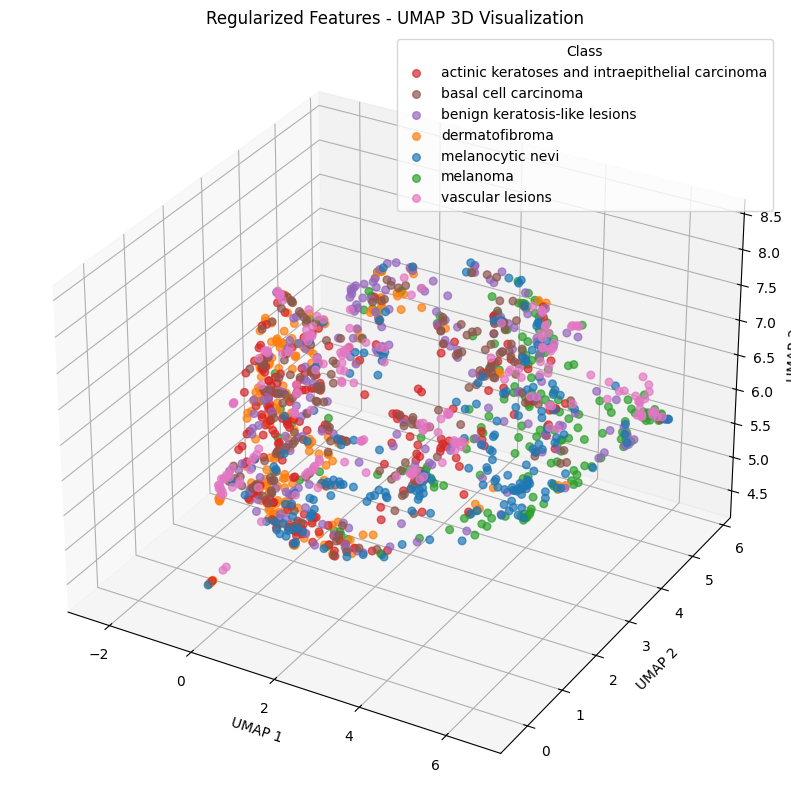

Comparing dimensionality reduction techniques on regularized features:
- t-SNE: Better for preserving local structure
- UMAP: Balance between global and local structure


In [ ]:
# CELL 11: Feature Dimensionality Reduction on Regularized Features

# Define consistent color mapping for exact same colors
class_colors = {
    'melanocytic nevi': '#1f77b4',           # blue
    'dermatofibroma': '#ff7f0e',             # orange
    'melanoma': '#2ca02c',                   # green
    'actinic keratoses and intraepithelial carcinoma': '#d62728',  # red
    'benign keratosis-like lesions': '#9467bd',  # purple
    'basal cell carcinoma': '#8c564b',       # brown
    'vascular lesions': '#e377c2'            # pink
}

# Create a directory for saving plots
os.makedirs("plots_regularized", exist_ok=True)

# Load test set features and labels using regularized features
print("Loading regularized features for dimensionality reduction...")
X_features = X_test_final  # Use regularized feature set (64 features)
y_labels = y_test

# Standardize class_names handling
if isinstance(class_names, dict):
    class_labels = [class_names.get(str(i), f"Class {i}") for i in range(len(class_names))]
else:
    class_labels = [get_class_label(i) for i in range(len(class_names))]

print(f"Visualizing {X_features.shape[1]} regularized features")

# 1. t-SNE Visualization - 2D
print("Performing t-SNE dimensionality reduction (2D)...")
plt.figure(figsize=(10, 8))
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne_2d = tsne_2d.fit_transform(X_features)

# Create DataFrame for easier plotting
df_tsne_2d = pd.DataFrame({
    'x': features_tsne_2d[:, 0],
    'y': features_tsne_2d[:, 1],
    'label': [get_class_label(l) for l in y_labels]
})

# Plot t-SNE 2D
sns.scatterplot(data=df_tsne_2d, x='x', y='y', hue='label', palette=class_colors, alpha=0.7)
plt.title('t-SNE 2D Visualization of Regularized Features')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Class')
plt.savefig('plots_regularized/tsne_2d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 1b. t-SNE Visualization - 3D
print("Performing t-SNE dimensionality reduction (3D)...")
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
features_tsne_3d = tsne_3d.fit_transform(X_features)

# Create DataFrame for 3D plotting
df_tsne_3d = pd.DataFrame({
    'x': features_tsne_3d[:, 0],
    'y': features_tsne_3d[:, 1],
    'z': features_tsne_3d[:, 2],
    'label': [get_class_label(l) for l in y_labels]
})

# Plot t-SNE 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique class labels
unique_labels = sorted(df_tsne_3d['label'].unique())  # Sort to maintain consistent order

# Plot each class with a different color
for label in unique_labels:
    mask = df_tsne_3d['label'] == label
    ax.scatter(
        df_tsne_3d.loc[mask, 'x'],
        df_tsne_3d.loc[mask, 'y'],
        df_tsne_3d.loc[mask, 'z'],
        color=class_colors[label],
        label=label,
        alpha=0.7,
        s=30
    )

ax.set_title('Regularized Features - t-SNE 3D Visualization')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.legend(title='Class')
plt.savefig('plots_regularized/tsne_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. UMAP Visualization - 2D
print("Performing UMAP dimensionality reduction (2D)...")
plt.figure(figsize=(10, 8))
umap_2d = umap.UMAP(n_components=2, random_state=42)
features_umap_2d = umap_2d.fit_transform(X_features)

# Create DataFrame for easier plotting
df_umap_2d = pd.DataFrame({
    'x': features_umap_2d[:, 0],
    'y': features_umap_2d[:, 1],
    'label': [get_class_label(l) for l in y_labels]
})

# Plot UMAP 2D
sns.scatterplot(data=df_umap_2d, x='x', y='y', hue='label', palette=class_colors, alpha=0.7)
plt.title('Regularized Features - UMAP 2D Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Class')
plt.savefig('plots_regularized/umap_2d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# 2b. UMAP Visualization - 3D
print("Performing UMAP dimensionality reduction (3D)...")
umap_3d = umap.UMAP(n_components=3, random_state=42)
features_umap_3d = umap_3d.fit_transform(X_features)

# Create DataFrame for 3D plotting
df_umap_3d = pd.DataFrame({
    'x': features_umap_3d[:, 0],
    'y': features_umap_3d[:, 1],
    'z': features_umap_3d[:, 2],
    'label': [get_class_label(l) for l in y_labels]
})

# Plot UMAP 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each class with a different color
for label in unique_labels:
    mask = df_umap_3d['label'] == label
    ax.scatter(
        df_umap_3d.loc[mask, 'x'],
        df_umap_3d.loc[mask, 'y'],
        df_umap_3d.loc[mask, 'z'],
        color=class_colors[label],
        label=label,
        alpha=0.7,
        s=30
    )

ax.set_title('Regularized Features - UMAP 3D Visualization')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.legend(title='Class')
plt.savefig('plots_regularized/umap_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Compare the methods
print("Comparing dimensionality reduction techniques on regularized features:")
print("- t-SNE: Better for preserving local structure")
print("- UMAP: Balance between global and local structure")